# **Part 4.1: Make your own Nanoparticles!**

In many cases it can be hard to view nanoparticles on the atomic scale, particularly very small nanoparticles. In these cases, computational techniques can help along with experimental results to understand more about nanoparticles. 

In this exercise, we will use one of these computational techniques to create models of low energy nanoparticles that may exist experimentally. This is called the genetic algorithm, which uses Darwin's theory of evolution to both create new and unique nanoparticles, as well as refine those nanoparticles which are the lowest in energy. 

The genetic algorithm works as follows:

<center>
<img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/Part_3.3/GA.png?raw=true" alt="drawing" width="350"/>
</center>

1. We start with a population of nanoparticles of different structures. 
2. We then make these nanoparticles together by mating two nanoparicles together to give an offspring that has structural features of the two parents, or mutating a nanoparticle by slightly perturbing it. This increases the size of the population.
3. The population is decreased back to its original size by removing those clusters that are "least fit". This means those nanoparticles that are highest in energy are removed from the population. This leaves only the lowest energy nanoparticles in the population.

We repeat steps 2 and 3 multiple times, called generations. After performing the genetic algorithm for many generations, we hope the genetic algorithm has found many of the relavant low energy nanoparticles that may be observed experimentally. 

## **Lets make some nanoparticles!**

Lets use the genetic algorithm to make some nanoparticles. To begin, <font color="195EBC" size="">**press the <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/playsvg.png?raw=true" alt="drawing" width="28"/> button to load all the prerequisite files to perform our simulations**</font>. 

In [1]:
#@markdown <font color="black" size="+2">←</font><font color="red" size="+1"> **Click the play button to load our prerequisite files**</font>

!echo --------------------------------
!echo Installing python programs, this may take longer than previously to load as we are loading more programs for this exercise
!echo This may take a minute or so...
!pip install ase==3.22.0 packaging asap3==3.11.10 Organisms &> /dev/nul
!echo Completed installing python programs
!if [ -d Computational_Silver_Nanoparticle_Exercise_Data ]; then rm -Rf Computational_Silver_Nanoparticle_Exercise_Data; fi
!echo --------------------------------
!echo Downloading background python scripts from github
!git clone https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data &> /dev/nul
!echo Completed downloading background python scripts from github
!echo --------------------------------

# ----------------------------------- #
# Made folder to run genetic algorithm in
import os, sys
np_ga_foldername = 'Nanoparticle_Genetic_Algorithm_Maker_Folder'
if not np_ga_foldername in os.getcwd():
    os.mkdir(np_ga_foldername)
    os.chdir(np_ga_foldername)
# ----------------------------------- #
# Add Computational_Silver_Nanoparticle_Exercise_Data to path so that it can still be accessed when importing files
csned_paths = '/content/Computational_Silver_Nanoparticle_Exercise_Data'
for root, dirs, files in os.walk(csned_paths):
    if os.path.isdir(root) and ('.git' not in root):
        #print('Adding '+str(root)+' to system paths for importing methods')
        sys.path.append(root)
# ----------------------------------- #
print('Everything is ready to go')
print('Currently in '+str(os.getcwd()))
# ----------------------------------- #
!echo --------------------------------

--------------------------------
Installing python programs, this may take longer than previously to load as we are loading more programs for this exercise
This may take a minute or so...
Completed installing python programs
--------------------------------
Completed downloading background python scripts from github
--------------------------------
Everything is ready to go
Currently in /content/Nanoparticle_Genetic_Algorithm_Maker_Folder
--------------------------------


Now lets perform the genetic algorithm. Below is a script that is set up to run a genetic algorithm to make silver nanoparticles. There is a lot going on in this script. However, the variables you want to focus on are:

* ``cluster_makeup``: This indicates what your nanoparticle is made of and how many atoms it contains. Feel free to change this (originally was ``{'Ag':55}``)
* ``pop_size``: This is the number of nanopartices in your population (originally was ``20``).
* ``no_offspring_per_generation``: This is the number of offspring nanoparticles to make using mating and mutation each generation (originally was ``16``).
* ``generations``: This is the number of generations to perform the genetic algorithm for (originally was ``30``).

Another setting that you may need to change is the line given as 

``from Computational_Silver_Nanoparticle_Exercise_Data.Set_of_RunMinimisation_Files.RunMinimisation_Ag import Minimisation_Function``

This includes methods for obtaining the energy of nanoparticles. Each type of element has its own program for obtaining the energies of nanoparticles of that element. The following elements that can be used in this program are gold (``Au``), silver (``Ag``), and copper (``Cu``). 

* For ``Au``, change ``RunMinimisation_Ag`` to ``RunMinimisation_Au``
* For ``Cu``, change ``RunMinimisation_Ag`` to ``RunMinimisation_Cu``
* For ``Ag``, keep using ``RunMinimisation_Ag``

Try running the program below to perform the genetic algorithm to make silver nanoparticles containing 55 atoms. This may take about a minute to run.

In [2]:
import os
if not os.path.exists('/content/Computational_Silver_Nanoparticle_Exercise_Data'):
    message = 'Could not load files. Make sure you have run the prerequisites before running this code.'
    tostring =  '\n'+'-'*len(message)+'\n'
    tostring += message+'\n'
    tostring += '-'*len(message)
    raise Exception(tostring)

!rm -rf GA_Run_Details.txt epoch_data epoch_data.backup ga_running.lock Population Recorded_Data Initial_Population Saved_Points_In_GA_Run Memory_Operator_Data Diversity_Information __pycache__

from sys import exit
from Organisms import GA_Program

# This details the elemental and number of atom composition of cluster that the user would like to investigate
cluster_makeup = {"Ag": 55}

# Surface details
surface_details = None #{'surface': 'surface.xyz', 'place_cluster_where': 'center'}

# These are the main variables of the genetic algorithm that with changes could affect the results of the Genetic Algorithm.
pop_size = 20
no_offspring_per_generation = 16
generations = 30

# These setting indicate how offspring should be made using the Mating and Mutation Proceedures
creating_offspring_mode = "Either_Mating_and_Mutation" 
crossover_type = "CAS_weighted"
mutation_types = [['random', 1.0]]
chance_of_mutation = 0.1

# This parameter will tell the Organisms program if an epoch is desired, and how the user would like to proceed.
epoch_settings = {'epoch mode': 'same population', 'max repeat': 5}

# These are variables used by the algorithm to make and place clusters in.
r_ij = 3.4
cell_length = r_ij * (sum([float(noAtoms) for noAtoms in list(cluster_makeup.values())]) ** (1.0/3.0))
vacuum_to_add_length = 10.0

# The RunMinimisation.py algorithm is one set by the user. It contain the def Minimisation_Function
# That is used for local optimisations. This can be written in whatever way the user wants to perform
# the local optimisations. This is meant to be as free as possible.
from Computational_Silver_Nanoparticle_Exercise_Data.Set_of_RunMinimisation_Files.RunMinimisation_Ag import Minimisation_Function

# This dictionary includes the information required to prevent clusters being placed in the population if they are too similar to clusters in this memory_operator
memory_operator_information = {'Method': 'Off'}

# This switch tells the genetic algorithm the type of predation scheme they want to place on the genetic algoithm.
#predation_information = {'Predation Operator':'Off'}
predation_information = {'Predation Operator':'Energy', 'mode': 'comprehensive', 'minimum_energy_diff': 0.025, 'type_of_comprehensive_scheme': 'fitness'}
#predation_information = {'Predation Operator': 'IDCM', 'percentage_diff': 5.0}
#predation_information = {'Predation Operator': 'SCM', 'SCM Scheme': 'T-SCM', 'rCut_high': 3.2, 'rCut_low': 2.9, 'rCut_resolution': 0.05}

# This switch tells the genetic algorithm the type of fitness scheme they want to place on the genetic algoithm.
energy_fitness_function = {'function': 'exponential', 'alpha': 3.0}
#SCM_fitness_function = {'function': 'exponential', 'alpha': 1.0}
fitness_information = {'Fitness Operator': 'Energy', 'fitness_function': energy_fitness_function}
#fitness_information = {'Fitness Operator': 'SCM + Energy', 'Use Predation Information': True, 'SCM_fitness_contribution': 0.5, 'normalise_similarities': False, 'Dynamic Mode': False, 'energy_fitness_function': energy_fitness_function, 'SCM_fitness_function': SCM_fitness_function}
#fitness_information = {'Fitness Operator': 'SCM + Energy', 'SCM Scheme': 'T-SCM', 'rCut_high': 3.2, 'rCut_low': 2.9, 'rCut_resolution': 0.05, 'SCM_fitness_contribution': 0.5, 'normalise_similarities': False, 'Dynamic Mode': False, 'energy_fitness_function': energy_fitness_function, 'SCM_fitness_function': SCM_fitness_function}
#fitness_information = {'Fitness Operator': 'SCM + Energy', 'SCM Scheme': 'T-SCM', 'rCut': 3.05, 'SCM_fitness_contribution': 0.5, 'normalise_similarities': False, 'Dynamic Mode': False, 'energy_fitness_function': energy_fitness_function, 'SCM_fitness_function': SCM_fitness_function}

# Variables required for the Recording_Cluster.py class/For recording the history as required of the genetic algorithm.
ga_recording_information = {}
ga_recording_information['ga_recording_scheme'] = 'All' # float('inf')
#ga_recording_information['limit_number_of_clusters_recorded'] = float('inf')
#ga_recording_information['limit_energy_height_of_clusters_recorded'] = float('inf') #eV
ga_recording_information['exclude_recording_cluster_screened_by_diversity_scheme'] = True
ga_recording_information['record_initial_population'] = False
ga_recording_information['saving_points_of_GA'] = []

# These are last techinical points that the algorithm is designed in mind
force_replace_pop_clusters_with_offspring = True
user_initialised_population_folder = None 
rounding_criteria = 10
print_details = False
no_of_cpus = 2
finish_algorithm_if_found_cluster_energy = None
total_length_of_running_time = 70.0

''' ---------------- '''
# This will execute the genetic algorithm program
GA_Program(cluster_makeup=cluster_makeup,
    pop_size=pop_size,
    generations=generations,
    no_offspring_per_generation=no_offspring_per_generation,
    creating_offspring_mode=creating_offspring_mode,
    crossover_type=crossover_type,
    mutation_types=mutation_types,
    chance_of_mutation=chance_of_mutation,
    r_ij=r_ij,
    vacuum_to_add_length=vacuum_to_add_length,
    Minimisation_Function=Minimisation_Function,
    surface_details=surface_details,
    epoch_settings=epoch_settings,
    cell_length=cell_length,
    memory_operator_information=memory_operator_information,
    predation_information=predation_information,
    fitness_information=fitness_information,
    ga_recording_information=ga_recording_information,
    force_replace_pop_clusters_with_offspring=force_replace_pop_clusters_with_offspring,
    user_initialised_population_folder=user_initialised_population_folder,
    rounding_criteria=rounding_criteria,
    print_details=print_details,
    no_of_cpus=no_of_cpus,
    finish_algorithm_if_found_cluster_energy=finish_algorithm_if_found_cluster_energy,
    total_length_of_running_time=total_length_of_running_time)
''' ---------------- '''

############################################################
############################################################
############################################################
The Otago Research Genetic Algorithm for Nanoclusters, Including Structural Methods and Similarity (Organisms) Program

.--------------------------------------------------------------------------.
|                             ,                                            |
|              ,_     ,     .'<_                                           |
|             _> `'-,'(__.-' __<                                           |
|             >_.--(.. )  =;`                                   _          |
|                  `V-'`'\/``                                  ('>         |
|                                                              /))@@@@@.   |
|         .----------------------------------.                /@"@@@@@()@  |
|         | Welcome to the Organisms program |               .@@()@@()@@@@ |
|   

' ---------------- '

Once your genetic algorithm has finished. it will have made lots of nanoparticles. These have been recorded in ``Recorded_Data/GA_Recording_Database.db``.

The code below will look through the ``GA_Recording_Database.db`` file and prepare them for us to look at.

In [3]:
import os
if not os.path.exists('/content/Computational_Silver_Nanoparticle_Exercise_Data'):
    message = 'Could not load files. Make sure you have run the prerequisites before running this code.'
    tostring =  '\n'+'-'*len(message)+'\n'
    tostring += message+'\n'
    tostring += '-'*len(message)
    raise Exception(tostring)

from ase.db import connect

path_to_database = 'Recorded_Data/GA_Recording_Database.db'
db = connect(path_to_database)

atoms_in_database = []
for row in db.select():
    atoms_in_database.append({'atoms': row.toatoms(), 'energy': row.cluster_energy})

atoms_in_database.sort(key=lambda system: system['energy'])

# ---------------------------------------------------------------------------------------------------------------------

columns = ["Energy (eV)", "Energy relative to lowest energy cluster (eV)"]

energies = [cluster['energy'] for cluster in atoms_in_database]
rel_energies = [(energy-energies[0]) for energy in energies]

names = list(range(len(atoms_in_database)))
data_values = [(energy, round(rel_energy,2)) for energy, rel_energy in zip(energies,rel_energies)]
index = 1
while index < len(data_values):
    if data_values[index][1] == data_values[index-1][1]:
        del data_values[index]
        del names[index]
    else:
        index += 1

energies = [energy for energy, rel_energy in data_values]
rel_energies = [rel_energy for energy, rel_energy in data_values]

print('The genetic algorithm has created '+str(len(data_values))+' different nanoparticles.')

The genetic algorithm has created 197 different nanoparticles.


The code below will create a plot that shows all the different nanoparticles you have created and their energies. Each cluster has been given a name from 0 upwards, where the lower the name of the cluster, the lower it's energy. Those clusters that are the same in energy to 2 decimal places have been excluded from this plot. 

Text(0.5, 0, 'Nanoparticle names')

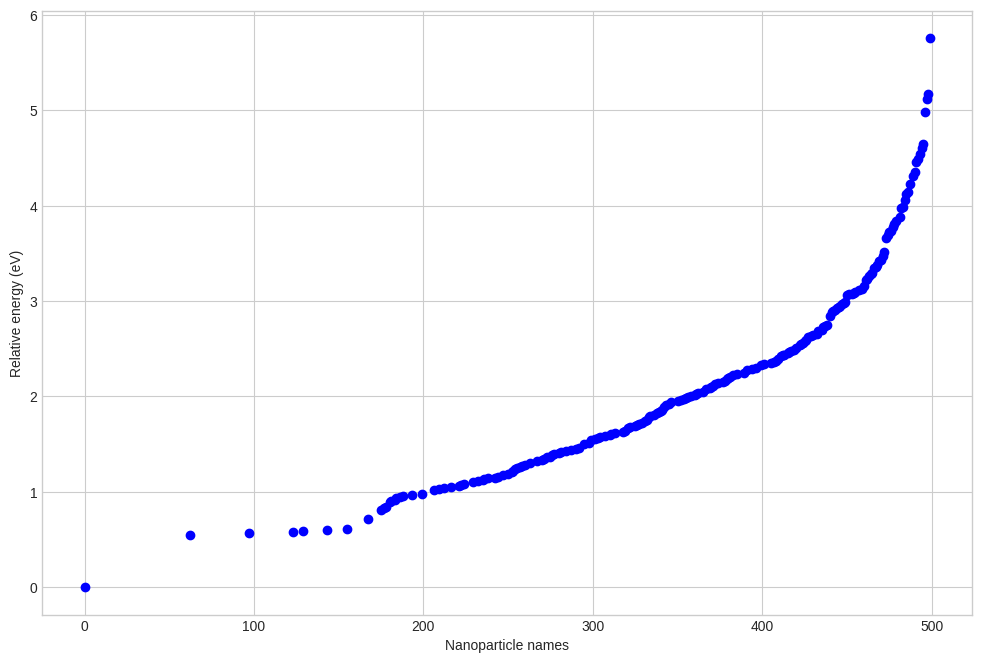

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8), dpi=100)
plt.style.use('seaborn-whitegrid')

plt.plot(names, rel_energies, 'o', color='blue');
plt.ylabel('Relative energy (eV)')
plt.xlabel('Nanoparticle names')

The code below will show a spreadsheet of the different clusters you have created and the name given to that nanoparticle, given as its ``index``.

In [5]:
import pandas as pd
data = pd.DataFrame(data_values, index=names, columns=columns)

from google.colab import data_table
data_table.enable_dataframe_formatter()

data

,Energy (eV),Energy relative to lowest energy cluster (eV)
0,-144.017035,0.00
62,-143.466859,0.55
97,-143.449748,0.57
123,-143.438372,0.58
129,-143.428865,0.59
...,...,...
495,-139.369723,4.65
496,-139.033220,4.98
497,-138.901451,5.12
498,-138.848302,5.17


In the code below, change the ``index`` variable with those given in the spreadsheet above.

In [6]:
import os
if not os.path.exists('/content/Computational_Silver_Nanoparticle_Exercise_Data'):
    message = 'Could not load files. Make sure you have run the prerequisites before running this code.'
    tostring =  '\n'+'-'*len(message)+'\n'
    tostring += message+'\n'
    tostring += '-'*len(message)
    raise Exception(tostring)

from Computational_Silver_Nanoparticle_Exercise_Data.viewer.x3d_viewer import view_x3d

index = 0 # Change this variable to an index that is given in the spreadsheet above and run this code again.

print('Energy of nanoparticle '+str(index)+' is: '+str(atoms_in_database[index]['energy'])+' eV')
view_x3d(atoms_in_database[index]['atoms'],'Exercise_4.1')

Energy of nanoparticle 0 is: -144.0170350614 eV


### **Questions**

>Q1: What types of surfaces do these low energy silver nanoparticles contain?

>A1:

>Q2: What types of defects do those nanoparticles that are slightly higher in energy than the lowest energy nanoparticles contain?

>A2: 

Did you get the same lowest energy nanoparticle as your friends? Talk to people around you and look at what they got? Is it the same as your? If not, maybe try running the genetic algorithm again, but set the ``generations`` variable in your code to ``60`` or ``90``, or whatever number you fancy.

## **Compare your genetic algorithm nanoparticles to other nanoparticles shapes**

The majority of clusters that you would have obtained from the genetic algorithm for Cu<sub>55</sub>, Ag<sub>55</sub>, or Au<sub>55</sub> would have been the icosahedral motif. 

Below are two different types of nanoparticles of Au<sub>55</sub> that have different surfaces features.

Below is a decahedral nanoparticles

In [7]:
import os
if not os.path.exists('/content/Computational_Silver_Nanoparticle_Exercise_Data'):
    message = 'Could not load files. Make sure you have run the prerequisites before running this code.'
    tostring =  '\n'+'-'*len(message)+'\n'
    tostring += message+'\n'
    tostring += '-'*len(message)
    raise Exception(tostring)

from Computational_Silver_Nanoparticle_Exercise_Data.Set_of_RunMinimisation_Files.RunMinimisation_Ag import Minimisation_Function
from ase.cluster.decahedron import Decahedron
from Computational_Silver_Nanoparticle_Exercise_Data.viewer.x3d_viewer import view_x3d

cluster = Decahedron('Ag',p=3,q=3,r=0)
cluster.set_cell((20,20,20))
cluster.center()
cluster.set_pbc(False)
print('Number of atoms: '+str(len(cluster)))

cluster, converged, Info = Minimisation_Function(cluster,None,None)

print('Energy of this nanoparticle: '+str(cluster.get_potential_energy())+' eV')
print('Energy difference between these cluster and the lowest energy cluster you obtained from your genetic algorithm (called index = 0): '+str(cluster.get_potential_energy()-atoms_in_database[0]['energy'])+' eV')
view_x3d(cluster,'Exercise_4.1')

Number of atoms: 55
Energy of this nanoparticle: -142.66023260161248 eV
Energy difference between these cluster and the lowest energy cluster you obtained from your genetic algorithm (called index = 0): 1.3568024597875308 eV


>Q3: What types of surfaces does this dechahedral nanoparticle contain?

>A3:

>Q4: What is the energy difference between the decahedral and icosahedral nanoparticle? (Read this from the code above)

>A4:

>Q5: Why do you think the icosahedral nanoparticle is energetically lower than the decahedral nanoparticle?

>A5:

Below is an octahedral nanoparticle.

In [8]:
import os
if not os.path.exists('/content/Computational_Silver_Nanoparticle_Exercise_Data'):
    message = 'Could not load files. Make sure you have run the prerequisites before running this code.'
    tostring =  '\n'+'-'*len(message)+'\n'
    tostring += message+'\n'
    tostring += '-'*len(message)
    raise Exception(tostring)

from Computational_Silver_Nanoparticle_Exercise_Data.Set_of_RunMinimisation_Files.RunMinimisation_Ag import Minimisation_Function
from ase.cluster.octahedron import Octahedron
from Computational_Silver_Nanoparticle_Exercise_Data.viewer.x3d_viewer import view_x3d

cluster = Octahedron('Ag',length=5,cutoff=2)
cluster.set_cell((20,20,20))
cluster.center()
cluster.set_pbc(False)
print('Number of atoms: '+str(len(cluster)))

cluster, converged, Info = Minimisation_Function(cluster,None,None)

print('Energy of this nanoparticle: '+str(cluster.get_potential_energy())+' eV')
print('Energy difference between these cluster and the lowest energy cluster you obtained from your genetic algorithm: '+str(cluster.get_potential_energy()-atoms_in_database[0]['energy'])+' eV')

view_x3d(cluster,'Exercise_4.1')

Number of atoms: 55
Energy of this nanoparticle: -142.35638803238413 eV
Energy difference between these cluster and the lowest energy cluster you obtained from your genetic algorithm: 1.6606470290158768 eV


>Q6: What types of surfaces does this octahedral nanoparticle contain?

>A6:

>Q7: What is the energy difference between the octahedral and icosahedral nanoparticle? (Read this from the code above)

>A7:

>Q8: Why do you think the icosahedral nanoparticle is energetically lower than the octahedral nanoparticle?

>A8:

Compare the energies of the decahedral and octahedral models from above:

>Q9: Record here the energy of the decahedral cluster model:

>A9:

>Q10: Record here the energy of the octahedral cluster model:

>A10:

>Q11: Does the decahedral or octahedral model have the lower energy? Is the  decahedral or octahedral model more stable?

>A11:

>Q12: Why do you think either the decahedral or octahedral model cluster is less energetic (more stable)?

>A12:

## **Notes from Geoff: Other things I have played around with (ignore this part of the worksheet, you are done, talk to Dave, and have a play around with the codes you have used today!)**

In [9]:
import os
if not os.path.exists('/content/Computational_Silver_Nanoparticle_Exercise_Data'):
    message = 'Could not load files. Make sure you have run the prerequisites before running this code.'
    tostring =  '\n'+'-'*len(message)+'\n'
    tostring += message+'\n'
    tostring += '-'*len(message)
    raise Exception(tostring)
    
from Computational_Silver_Nanoparticle_Exercise_Data.Set_of_RunMinimisation_Files.RunMinimisation_Ag import Minimisation_Function
from ase.cluster.icosahedron import Icosahedron
from Computational_Silver_Nanoparticle_Exercise_Data.viewer.x3d_viewer import view_x3d

cluster = Icosahedron('Ag',noshells=3)
cluster.set_cell((20,20,20))
cluster.center()
cluster.set_pbc(False)
print('Number of atoms: '+str(len(cluster)))

cluster, converged, Info = Minimisation_Function(cluster,None,None)

print('Energy of this nanoparticle: '+str(cluster.get_potential_energy())+' eV')
print('Energy difference between these cluster and the lowest energy cluster you obtained from your genetic algorithm: '+str(cluster.get_potential_energy()-atoms_in_database[0]['energy'])+' eV')
view_x3d(cluster,'Exercise_4.1')

Number of atoms: 55
Energy of this nanoparticle: -144.01692729016395 eV
Energy difference between these cluster and the lowest energy cluster you obtained from your genetic algorithm: 0.00010777123605976158 eV
